# Bazni model konvolucijske neuronske mreže

Ovaj model će koristiti isključivo uzorkovani podatkovni set za trening, testiranje i validaciju.  

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Početno postavljanje

In [ ]:
# Funkcija za prikaz metrika povijesti treniranja
def plot_all_metrics(history):
    epochs = range(1, len(history['accuracy']) + 1)

    metrics_to_plot = ['accuracy', 'precision', 'recall', 'auc', 'loss']
    metric_titles = {
        'accuracy': 'Točnost',
        'precision': 'Preciznost',
        'recall': 'Osjetljivost',
        'auc': 'AUC',
        'loss': 'Gubitak'
    }

    for metric in metrics_to_plot:
        plt.figure(figsize=(12, 6))

        # Graf trening metrika
        plt.plot(epochs, history[metric], 'bo', label=f'Trening {metric_titles[metric]}')

        # Graf validacijskih metrika
        val_metric = f'val_{metric}'
        plt.plot(epochs, history[val_metric], 'b', label=f'Validacija {metric_titles[metric]}')

        plt.title(f'Trening i validacija - {metric_titles[metric]}')
        plt.xlabel('Epoha')
        plt.ylabel(metric_titles[metric])
        plt.legend()

        plt.show()


## Definiranje arhitekture modela

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

# Konvolucijska baza
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)

# Gusti sloj
x = layers.Dense(512, activation="relu")(x)

# Završni sloj za  binarnu klasifikaciju
outputs = layers.Dense(1, activation="sigmoid")(x)

# Kreiranje modela
model = keras.Model(inputs=inputs, outputs=outputs)

## Kompajliranje modela

In [3]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall'),
        keras.metrics.AUC(name='auc')
    ]
)

## Učitavanje podataka

In [4]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    '/content/drive/MyDrive/cats_vs_dogs_baseline_subset/train',
    label_mode='binary',
    image_size=(180, 180),
    batch_size=32
)

validation_dataset = image_dataset_from_directory(
    '/content/drive/MyDrive/cats_vs_dogs_baseline_subset/validation',
    label_mode='binary',
    image_size=(180, 180),
    batch_size=32
)

test_dataset = image_dataset_from_directory(
    '/content/drive/MyDrive/cats_vs_dogs_baseline_subset/test',
    label_mode='binary',
    image_size=(180, 180),
    batch_size=32,
    shuffle=False
)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

## Treniranje modela

Dobra je praksa spremati modele nakon svake trening epohe, stoga će isto biti učinjeno i u ovome slučaju.

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="/content/drive/MyDrive/baseline_cnn_model.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)

Epoch 1/30
63/63 [==============================] - 589s 9s/step - loss: 0.6195 - accuracy: 0.6945 - precision: 0.7008 - recall: 0.9836 - auc: 0.5732 - val_loss: 0.5878 - val_accuracy: 0.7000 - val_precision: 0.7000 - val_recall: 1.0000 - val_auc: 0.6676
Epoch 2/30
63/63 [==============================] - 249s 4s/step - loss: 0.5961 - accuracy: 0.7000 - precision: 0.7000 - recall: 1.0000 - auc: 0.6136 - val_loss: 0.6254 - val_accuracy: 0.7000 - val_precision: 0.7000 - val_recall: 1.0000 - val_auc: 0.6648
Epoch 3/30
63/63 [==============================] - 238s 4s/step - loss: 0.5897 - accuracy: 0.7000 - precision: 0.7000 - recall: 1.0000 - auc: 0.6369 - val_loss: 0.5793 - val_accuracy: 0.7000 - val_precision: 0.7000 - val_recall: 1.0000 - val_auc: 0.6971
Epoch 4/30
63/63 [==============================] - 233s 4s/step - loss: 0.5608 - accuracy: 0.7040 - precision: 0.7055 - recall: 0.9907 - auc: 0.6884 - val_loss: 0.5560 - val_accuracy: 0.7210 - val_precision: 0.7608 - val_recall: 0.877

## Rezultati i najbolji model

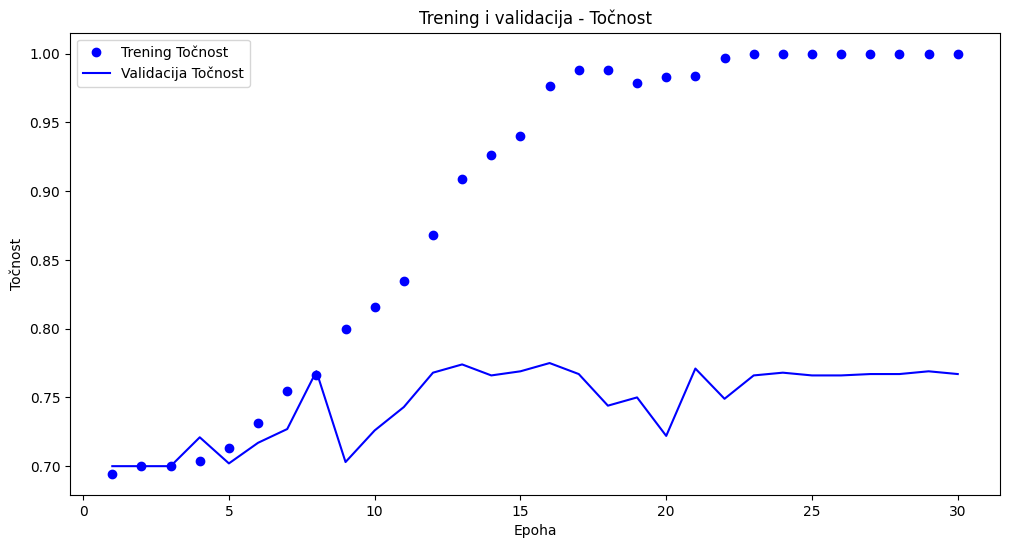

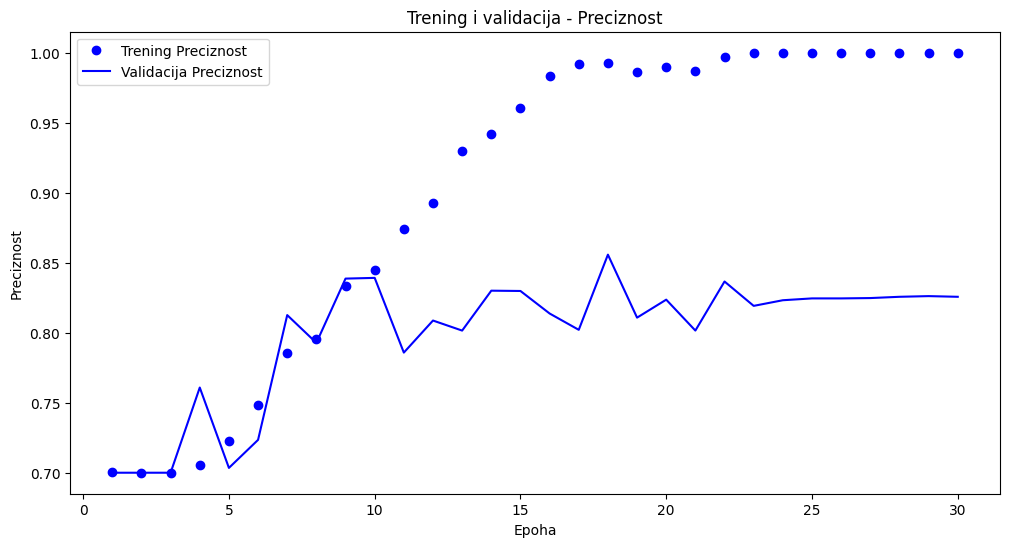

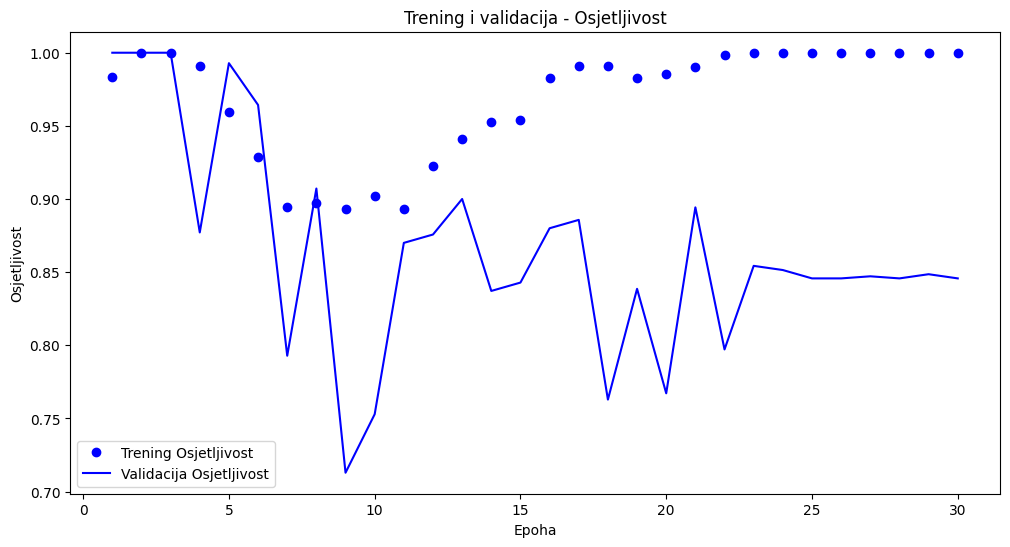

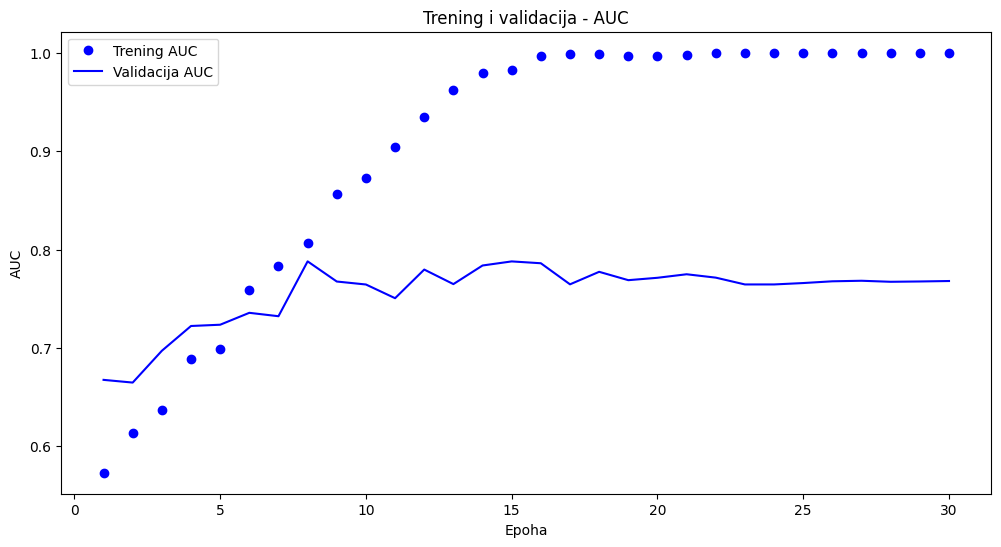

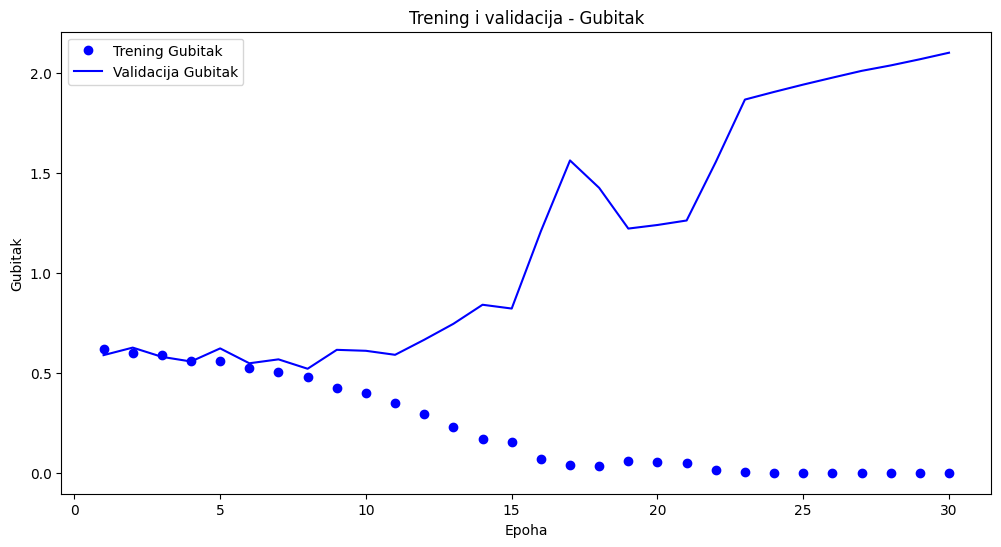

In [ ]:
# Prikaz svih praćenih metrika
plot_all_metrics(history.history)

In [8]:
from tensorflow.keras import metrics

# Učitavanje najboljeg modela (po gubitku)
test_model = keras.models.load_model("/content/drive/MyDrive/baseline_cnn_model.keras")

# Evaluacija najboljeg modela nad testnim podatkovnim setom
test_metrics = test_model.evaluate(test_dataset)

# test_metrics u prvom elementu ima spremljen gubitak,
# ostali elementi su metrike redom pojavljivanja kao i kod kompajliranja modela
print(f"Test gubitak: {test_metrics[0]:.3f}")
print(f"Test točnost: {test_metrics[1]:.3f}")
print(f"Test preciznost: {test_metrics[2]:.3f}")
print(f"Test osjetljivost: {test_metrics[3]:.3f}")
print(f"Test AUC: {test_metrics[4]:.3f}")


63/63 [==============================] - 82s 1s/step - loss: 0.5240 - accuracy: 0.7495 - precision: 0.7794 - recall: 0.8957 - auc: 0.7720
Test gubitak: 0.524
Test točnost: 0.749
Test preciznost: 0.779
Test osjetljivost: 0.896
Test AUC: 0.772


In [9]:
import numpy as np

# Ekstrakcija istinitih vrijednosti i predviđenih vjerojatnosti iz testnog seta
y_true = np.concatenate([y for x, y in test_dataset], axis=0)
y_pred = test_model.predict(test_dataset)


63/63 [==============================] - 34s 532ms/step


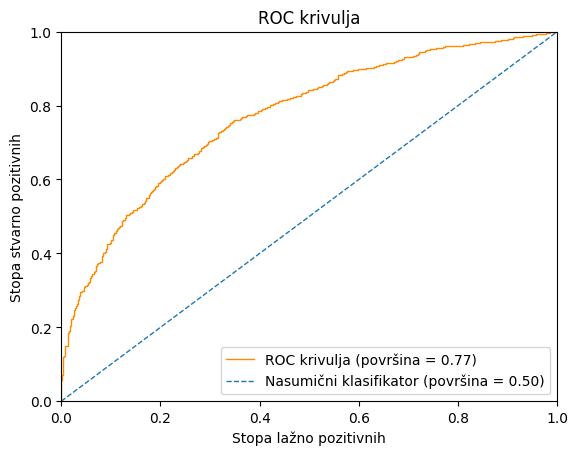

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC krivulja i AUC
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Vrijednosti nasumičnog klasifikatora (50%)
fpr_random = [0, 1]
tpr_random = [0, 1]

# Crtanje ROC krivulje
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC krivulja (površina = %0.2f)' % roc_auc)
plt.plot(fpr_random, tpr_random, linestyle='--', lw=1, label='Nasumični klasifikator (površina = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Stopa lažno pozitivnih')
plt.ylabel('Stopa stvarno pozitivnih')
plt.title('ROC krivulja')
plt.legend(loc="lower right")
plt.show()


### Performanse modela nad manje zastupljenom klasom

In [13]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Konverzija predviđenih vjerojatnosti u dvije klase
y_pred_labels = (y_pred > 0.5).astype("int32")

# Detaljizirano klasifikacijsko izvješće
print(classification_report(y_true, y_pred_labels, target_names=['mačka', 'pas']))

# Metrike za klasu mačka.
precision = precision_score(y_true, y_pred_labels, pos_label=0)
recall = recall_score(y_true, y_pred_labels, pos_label=0)
f1 = f1_score(y_true, y_pred_labels, pos_label=0)

print(f'Preciznost za klasu mačka: {precision:.3f}')
print(f'Osjetljivost za klasu mačka: {recall:.3f}')
print(f'F1 metrika za klasu mačka: {f1:.3f}')


              precision    recall  f1-score   support

       mačka       0.63      0.41      0.49       600
         pas       0.78      0.90      0.83      1400

    accuracy                           0.75      2000
   macro avg       0.70      0.65      0.66      2000
weighted avg       0.73      0.75      0.73      2000

Preciznost za klasu mačka: 0.627
Osjetljivost za klasu mačka: 0.408
F1 metrika za klasu mačka: 0.494
